# PA 4: Association Analysis - Apriori Algorithm

## Student Details

NO REPORT REQUIRED


## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA4'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA4.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA4'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA4'  

Step 4: Your submission folder should include ONLY the following files:
    * apriory.py,
    * lastname_firstname_yourNetID_PA4.ipynb, 
    * dataset.csv,
    * toyDS.csv

Step 5: Zip this folder and submit it on Canvas. Your final submission folder name should be 'lastname_firstname_yourNetID_PA4.ZIP'


## Programming Assignment Details

Before you start:
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.
* and the FPgrowth Algorithm [03].

NOTE : Each team will have a total of 3 .ipynb file. Each member will work on a different dataset.csv file

The datasets to be used are :

1.Market_Basket_Optimisation.csv

2.bread basket.csv

3.Groceries_dataset.csv

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [91]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [92]:
# Import your Libraries
import pandas as pd
from pandas import DataFrame
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import apriori
from apriori import getItemSetTransactionList
from apriori import returnItemsWithMinSupport
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from apriori import runApriori
from apriori import printResults
from apriori import dataFromFile
from apriori import joinSet
from apriori import subsets
from IPython.display import Image
# Above are the only libraries you can use. Do not make any changes above.
# -10 will be deducted, if you use additional libraries apart from these.

### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


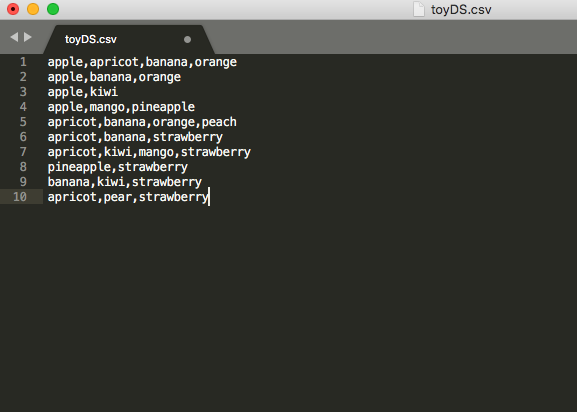

In [93]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

In [94]:
# The original dataset contain Member_number, Date, itemDescription 
groceries_data = pd.read_csv("Groceries_dataset.csv")
groceries_data

Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552    5/1/2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12/12/2015       other vegetables
4               3037    1/2/2015             whole milk
...              ...         ...                    ...
38760           4471   8/10/2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510   3/12/2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]

In [95]:
# Drop the nan data
# https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe#:~:text=Pandas%20DataFrame%20dropna()%20function%20is%20used%20to%20remove%20rows,NaT%2C%20and%20numpy.
groceries_data = groceries_data.dropna()
groceries_data

Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552    5/1/2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12/12/2015       other vegetables
4               3037    1/2/2015             whole milk
...              ...         ...                    ...
38760           4471   8/10/2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510   3/12/2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]

In [96]:
# We need to put the item with the same Member_number together 
# How to group dataframe rows into list in Pandas Groupby 
# There is two way to group the row 
# https://www.geeksforgeeks.org/how-to-group-dataframe-rows-into-list-in-pandas-groupby/ 
groceries_data = groceries_data.groupby('Member_number').agg({'itemDescription': lambda x: list(x)})
groceries_data = pd.DataFrame(groceries_data)
groceries_data

itemDescription
Member_number                                                   
1000           [soda, canned beer, sausage, sausage, whole mi...
1001           [frankfurter, frankfurter, beef, sausage, whol...
1002           [tropical fruit, butter milk, butter, frozen v...
1003           [sausage, root vegetables, rolls/buns, deterge...
1004           [other vegetables, pip fruit, root vegetables,...
...                                                          ...
4996           [dessert, salty snack, rolls/buns, misc. bever...
4997           [tropical fruit, white wine, whole milk, curd,...
4998                                          [rolls/buns, curd]
4999           [bottled water, butter milk, tropical fruit, b...
5000           [soda, bottled beer, fruit/vegetable juice, ro...

[3898 rows x 1 columns]

In [97]:
# We need to put the item in list 
# How to Convert Pandas DataFrame into a List 
# https://datatofish.com/convert-pandas-dataframe-to-list/ 
groceries_data = groceries_data["itemDescription"].values.tolist() 
# We are going to use the item list to process FP Growth 
item_list = groceries_data
groceries_data[:10]

[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

In [98]:
# We need to convert list to DataFrame 
groceries_data = pd.DataFrame(groceries_data) 
groceries_data

0                1                      2   \
0                 soda      canned beer                sausage   
1          frankfurter      frankfurter                   beef   
2       tropical fruit      butter milk                 butter   
3              sausage  root vegetables             rolls/buns   
4     other vegetables        pip fruit        root vegetables   
...                ...              ...                    ...   
3893           dessert      salty snack             rolls/buns   
3894    tropical fruit       white wine             whole milk   
3895        rolls/buns             curd                   None   
3896     bottled water      butter milk         tropical fruit   
3897              soda     bottled beer  fruit/vegetable juice   

                     3                 4                    5   \
0               sausage        whole milk           whole milk   
1               sausage        whole milk                 soda   
2     frozen vegetables             sugar  specialty chocolate   
3             detergent      frozen meals           rolls/buns   
4           canned beer        rolls/buns           whole milk   
...                 ...               ...                  ...   
3893    misc. beverages      bottled beer       tropical fruit   
3894               curd            grapes          canned beer   
3895               None              None                 None   
3896            berries           berries     other vegetables   
3897    root vegetables  other vegetables               onions   

                       6                 7                    8   \
0      pickled vegetables   misc. beverages  semi-finished bread   
1                    curd       white bread           whole milk   
2              whole milk  other vegetables                 None   
3             dental care        rolls/buns                 None   
4        other vegetables  hygiene articles           whole milk   
...                   ...               ...                  ...   
3893        bottled water       decalcifier  semi-finished bread   
3894                 None              None                 None   
3895                 None              None                 None   
3896  semi-finished bread             herbs   whipped/sour cream   
3897  semi-finished bread              None                 None   

                    9   ...    26    27    28    29    30    31    32    33  \
0     hygiene articles  ...  None  None  None  None  None  None  None  None   
1                 soda  ...  None  None  None  None  None  None  None  None   
2                 None  ...  None  None  None  None  None  None  None  None   
3                 None  ...  None  None  None  None  None  None  None  None   
4           whole milk  ...  None  None  None  None  None  None  None  None   
...                ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
3893              soda  ...  None  None  None  None  None  None  None  None   
3894              None  ...  None  None  None  None  None  None  None  None   
3895              None  ...  None  None  None  None  None  None  None  None   
3896  other vegetables  ...  None  None  None  None  None  None  None  None   
3897              None  ...  None  None  None  None  None  None  None  None   

        34    35  
0     None  None  
1     None  None  
2     None  None  
3     None  None  
4     None  None  
...    ...   ...  
3893  None  None  
3894  None  None  
3895  None  None  
3896  None  None  
3897  None  None  

[3898 rows x 36 columns]

In [99]:
# Your submission folder should include ONLY the following files: * apriory.py, * lastname_firstname_yourNetID_PA4.ipynb, * dataset.csv, * toyDS.csv 
# Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv. Each transaction is at one line with a variable length 
# We need to store the above dataset into the toyDS.csv 
# The above datast contain number in the first row and the first column 
# We need to need omit header and index in above dataset and store it into csv 
# https://stackoverflow.com/questions/51395805/pandas-to-csv-skipping-the-first-row-of-dataframe 
groceries_data.to_csv("dataset.csv", sep=",", index=False, header=None)

### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [100]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=8% and minimum confidence=5%)')
# https://github.com/asaini/Apriori/blob/c868692a89ffd180da7c7f8828550ec166cee69e/test_apriori.py
inFile = apriori.dataFromFile("dataset.csv")
minSupport = 0.15
minConfidence = 0.5
items, rules = runApriori(inFile, minSupport, minConfidence)
print ('Case 1 Reasoning:\n 1. Minimum confidence is set at 50% and minimum support is set at 15%.\n 2. Because lesser values for support result in almost identical transaction frequencies, the minimum support is 15%, and 15%\n    yielded more acceptable itemsets.\n'\
      ' 3.  This generates a total of 20 itemsets\n 4. The rules must have a greater confidence value than the support value.\n 5. When support exceeds confidence, rules become deceptive because the likelihood of possessing one object diminishes the\n    likelihood of possessing another in a transaction.'\
      '\n 6. If one item is already in the cart, the confidence level is 50%.. ')
print ('Case 1 Output:')
apriori.printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=8% and minimum confidence=5%)
Case 1 Reasoning:
 1. Minimum confidence is set at 50% and minimum support is set at 15%.
 2. Because lesser values for support result in almost identical transaction frequencies, the minimum support is 15%, and 15%
    yielded more acceptable itemsets.
 3.  This generates a total of 20 itemsets
 4. The rules must have a greater confidence value than the support value.
 5. When support exceeds confidence, rules become deceptive because the likelihood of possessing one object diminishes the
    likelihood of possessing another in a transaction.
 6. If one item is already in the cart, the confidence level is 50%.. 
Case 1 Output:

------------ITEMS-----------------
item: ('yogurt', 'whole milk') , 0.151
item: ('soda', 'whole milk') , 0.151
item: ('whipped/sour cream',) , 0.155
item: ('bottled beer',) , 0.159
item: ('canned beer',) , 0.165
item: ('shopping bags',) , 0.168
ite

In [101]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=3% and minimum confidence=5%)') 
# https://github.com/asaini/Apriori/blob/c868692a89ffd180da7c7f8828550ec166cee69e/test_apriori.py
inFile = apriori.dataFromFile("dataset.csv")
minSupport = 0.12
minConfidence = 0.45
items, rules = runApriori(inFile, minSupport, minConfidence)
print ('Case 2 Reasoning:\n 1. Minimum support is set as 0.12 and minimum confidence is 0.45\n 2. The minimum support value and minimum confidence are both reduced as a result of this.The possibility of picking more\n    things from an item set in the basket increases when the minimum support is reduced.\n'\
      ' 3. In this instance, the number of rules created rose from one to four.\n 4. If soda, rolls/buns, veggies, or yogurt are added to the basket, whole milk will be added at least 45 percent of the time.')
print ('Case 2 Output:')
apriori.printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=3% and minimum confidence=5%)
Case 2 Reasoning:
 1. Minimum support is set as 0.12 and minimum confidence is 0.45
 2. The minimum support value and minimum confidence are both reduced as a result of this.The possibility of picking more
    things from an item set in the basket increases when the minimum support is reduced.
 3. In this instance, the number of rules created rose from one to four.
 4. If soda, rolls/buns, veggies, or yogurt are added to the basket, whole milk will be added at least 45 percent of the time.
Case 2 Output:

------------ITEMS-----------------
item: ('other vegetables', 'yogurt') , 0.120
item: ('curd',) , 0.121
item: ('other vegetables', 'soda') , 0.124
item: ('fruit/vegetable juice',) , 0.125
item: ('butter',) , 0.126
item: ('pork',) , 0.132
item: ('domestic eggs',) , 0.133
item: ('brown bread',) , 0.136
item: ('frankfurter',) , 0.138
item: ('newspapers',) , 0.140
item: ('oth

In [102]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=1% and minimum confidence=5%)')
# https://github.com/asaini/Apriori/blob/c868692a89ffd180da7c7f8828550ec166cee69e/test_apriori.py
inFile = apriori.dataFromFile("dataset.csv")
minSupport = 0.10
minConfidence = 0.35
items, rules = runApriori(inFile, minSupport, minConfidence)
print ('Case 2 Reasoning:\n 1. The minimum support value has been reduced to 10%, while the required confidence has been reduced to 35%.\n 2. The number of itemsets created grew to 42 as the amount of minimal support was reduced.The number of itemsets will increase\n    if the minimum support value is reduced more.\n'\
      ' 3. As the minimum confidence value is reduced, the number of rules acquired grows, significantly improving the likelihood of\n    an item transaction.As a result, the number of rules lowers as the confidence value grows, and vice versa.\n 4. When item X is picked, the likelihood of item Y being chosen is high.\n'\
      ' 5. We can deduce from the rules that when wholemilk, yogurt, and whole buns are purchased, there is a 50% chance that\n    vegetables will be added to the basket, and when root vegetables, soda, tropical fruit, other vegetables, rolls/buns, and\n    yogurt are purchased, there is a 50% chance that whole milk will be added to the basket.')
print ('Case 2 Output:')
apriori.printResults(items, rules)

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=1% and minimum confidence=5%)
Case 2 Reasoning:
 1. The minimum support value has been reduced to 10%, while the required confidence has been reduced to 35%.
 2. The number of itemsets created grew to 42 as the amount of minimal support was reduced.The number of itemsets will increase
    if the minimum support value is reduced more.
 3. As the minimum confidence value is reduced, the number of rules acquired grows, significantly improving the likelihood of
    an item transaction.As a result, the number of rules lowers as the confidence value grows, and vice versa.
 4. When item X is picked, the likelihood of item Y being chosen is high.
 5. We can deduce from the rules that when wholemilk, yogurt, and whole buns are purchased, there is a 50% chance that
    vegetables will be added to the basket, and when root vegetables, soda, tropical fruit, other vegetables, rolls/buns, and
    yogurt are purchase

### Task 3: Run FPgrowth and Evaluate Results 
In this task, you have to find how you will be able to execute and print FPgrowth results using mlxtend.
In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!".

(*) For those that are not familiar with python and coding this could be a quite demanding task.

You will have to execute apriori algorithm "3" times for different combinations of support and confidence. Print the results of FPgrowth for 'dataset.csv'. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way.

 

In [103]:
# The DataSet Preprocess for FPgrowth 
# We can transform it into the right format via the TransactionEncoder 
# # http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/ 
dataset = item_list
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                     False     False             False             False   
1                     False     False             False             False   
2                     False     False             False             False   
3                     False     False             False             False   
4                     False     False             False             False   
...                     ...       ...               ...               ...   
3893                  False     False             False             False   
3894                  False     False             False             False   
3895                  False     False             False             False   
3896                  False     False             False             False   
3897                  False     False             False             False   

      baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0              False  False          False             False  False    False   
1              False  False          False             False   True    False   
2              False  False          False             False  False    False   
3              False  False          False             False  False    False   
4              False  False          False             False  False    False   
...              ...    ...            ...               ...    ...      ...   
3893           False  False          False             False  False    False   
3894           False  False          False             False  False    False   
3895           False  False          False             False  False    False   
3896           False  False          False             False  False     True   
3897           False  False          False             False  False    False   

      ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0     ...   False    False    False               False   False        False   
1     ...   False    False    False                True   False         True   
2     ...   False    False    False               False   False        False   
3     ...   False    False    False               False   False        False   
4     ...   False    False    False               False   False        False   
...   ...     ...      ...      ...                 ...     ...          ...   
3893  ...   False    False    False               False   False        False   
3894  ...   False    False    False               False   False        False   
3895  ...   False    False    False               False   False        False   
3896  ...   False    False    False                True   False        False   
3897  ...   False    False    False               False   False        False   

      white wine  whole milk  yogurt  zwieback  
0          False        True    True     False  
1          False        True   False     False  
2          False        True   False     False  
3          False       False   False     False  
4          False        True   False     False  
...          ...         ...     ...       ...  
3893       False       False   False     False  
3894        True        True   False     False  
3895       False       False   False     False  
3896       False       False    True     False  
3897       False       False   False     False  

[3898 rows x 167 columns]

In [104]:
print ('# # # # # # # # #  Code for Task 3, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=8%)')
print ('Case 1 Reasoning:\n We must define the minimal support in order to apply the FPgrowth algorithm. Wel will start with a large value and gradually lower it. There are fewer itemsets if the value is high. There are more itemset if the value is low.Here minimum support is set as 8%. The support specifically informs us of the number of times (or percentage) that the goods co-occur. There are 65 itemsets in instance 1. It is bidirectional and represents one combination. The customer who buys bottled water also buys whole milk, and viceversa.')
print ('Case 1 Output:')
fpgrowth(df, min_support=0.08, use_colnames=True)

# # # # # # # # #  Code for Task 3, Case:1 # # # # # # # # #
Case 1 (minimum support=8%)
Case 1 Reasoning:
 We must define the minimal support in order to apply the FPgrowth algorithm. Wel will start with a large value and gradually lower it. There are fewer itemsets if the value is high. There are more itemset if the value is low.Here minimum support is set as 8%. The support specifically informs us of the number of times (or percentage) that the goods co-occur. There are 65 itemsets in instance 1. It is bidirectional and represents one combination. The customer who buys bottled water also buys whole milk, and viceversa.
Case 1 Output:


support                           itemsets
0   0.458184                       (whole milk)
1   0.313494                             (soda)
2   0.282966                           (yogurt)
3   0.206003                          (sausage)
4   0.177527                           (pastry)
..       ...                                ...
60  0.091329        (shopping bags, whole milk)
61  0.112365        (bottled water, whole milk)
62  0.093894  (other vegetables, bottled water)
63  0.085428         (bottled beer, whole milk)
64  0.092355         (whole milk, citrus fruit)

[65 rows x 2 columns]

In [105]:
print ('# # # # # # # # #  Code for Task 3, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=3%)')
print ('Case 1 Reasoning:\nThe minimal level of support has been reduced. There are more items in the collection. It is more informative. So we can have a better idea of what items are typically purchased together. In particular, we only have 65 itemsets in Case 1. In example 2, however, we have 415 itemsets. As a result, the shopkeeper may choose which items should be placed on the same shelf. As a result, the consumer is more inclined to purchase them all at the same time. The rule states that when a consumer purchases waffles, they  also purchase whole milk, and vice versa. Customers that purchase ice cream also purchase whole milk, and vice versa. Customers that purchase other vegetables also purchase waffle and vice versa.')
print ('Case 1 Output:')
fpgrowth(df, min_support=0.03, use_colnames=True)

# # # # # # # # #  Code for Task 3, Case:2 # # # # # # # # #
Case 2 (minimum support=3%)
Case 1 Reasoning:
The minimal level of support has been reduced. There are more items in the collection. It is more informative. So we can have a better idea of what items are typically purchased together. In particular, we only have 65 itemsets in Case 1. In example 2, however, we have 415 itemsets. As a result, the shopkeeper may choose which items should be placed on the same shelf. As a result, the consumer is more inclined to purchase them all at the same time. The rule states that when a consumer purchases waffles, they  also purchase whole milk, and vice versa. Customers that purchase ice cream also purchase whole milk, and vice versa. Customers that purchase other vegetables also purchase waffle and vice versa.
Case 1 Output:


support                              itemsets
0    0.458184                          (whole milk)
1    0.313494                                (soda)
2    0.282966                              (yogurt)
3    0.206003                             (sausage)
4    0.177527                              (pastry)
..        ...                                   ...
410  0.034120               (root vegetables, pork)
411  0.030015  (other vegetables, pork, whole milk)
412  0.030272               (ice cream, whole milk)
413  0.037968                 (waffles, whole milk)
414  0.031042           (other vegetables, waffles)

[415 rows x 2 columns]

In [106]:
print ('# # # # # # # # #  Code for Task 3, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=0.1%)')
print ('Case 1 Reasoning:\n The minimal level of support has been reduced much more. As a result, a vast number of itemset were created. The running time in case 3 is poor.We may see additional item association in the itemset. In the itemset, there are additional items. The seasonal product, for example, does not appear in the case 1 and case 2 itemsets. As a result, it provides specific information to assist the management in achieving their company objectives.')
print ('Case 1 Output:')
fpgrowth(df, min_support=0.01, use_colnames=True)

# # # # # # # # #  Code for Task 3, Case:3 # # # # # # # # #
Case 3 (minimum support=0.1%)
Case 1 Reasoning:
 The minimal level of support has been reduced much more. As a result, a vast number of itemset were created. The running time in case 3 is poor.We may see additional item association in the itemset. In the itemset, there are additional items. The seasonal product, for example, does not appear in the case 1 and case 2 itemsets. As a result, it provides specific information to assist the management in achieving their company objectives.
Case 1 Output:


support                               itemsets
0     0.458184                           (whole milk)
1     0.313494                                 (soda)
2     0.282966                               (yogurt)
3     0.206003                              (sausage)
4     0.177527                               (pastry)
...        ...                                    ...
3011  0.013340        (seasonal products, whole milk)
3012  0.010262        (seasonal products, rolls/buns)
3013  0.010005  (seasonal products, other vegetables)
3014  0.010005                 (soda, frozen dessert)
3015  0.012057           (frozen dessert, whole milk)

[3016 rows x 2 columns]

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori

[03] http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/ 



# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [20 points] - DataSet Preprocess for Apriory.py  
* [20 points] - Run Apriory.py
* [20 points] - DataSet Preprocess for  FPgrowth
* [30 points] - Run FPgrowth
 
